# PLOT Variation to positon graph

In [4]:
# Import Lib

import numpy as np
import pandas as pd

In [5]:
## Step by step process in pre process 
# 1. Load data file to pandas data frame
def load_data(file_parth):
    df = pd.read_csv(file_parth, sep=",", names=["Time", "Force_command", "Force_responce", "Position_responce"])
    #print(df.shape)

    df = df.dropna() # 2. drop NaN
    #print(df.shape)
    #df

    # 2. Changing data type of position column to string to float
    data_type = df["Position_responce"].dtype
    print(data_type)

    if data_type != "int64":
        print("needed to change dtype")
        df['Position_responce'] = pd.to_numeric(df['Position_responce'],errors='coerce')
        df["Position_responce"].dtype
    else:
        print("No need to change the data type")
    
    data_type = df["Position_responce"].dtype
    #print(data_type)

    return df


## Calculating mean of each 2500 rows ang give outputs
def mean_calculator(df):
    # Creating lable column with same lable value for each 2500 rows
    df['label']=np.divmod(np.arange(len(df)),2500)[0]+1

    # Mean calcuating under same lable value
    mean_with_lable = (df.groupby((df.label != df.label.shift()).cumsum()).mean().reset_index(drop=True))

    # Remove the lable from the dataframe
    df_no_fetures = mean_with_lable.drop(['label'], axis=1)
    
    # print the datafroame with no lales
    return df_no_fetures



def feature_creator(df_no_fetures):
    # Trnsform df to np array 
    # print(df_no_fetures.shape)
    measurements_arr = df_no_fetures.to_numpy()
    
    features = np.zeros((df_no_fetures.shape[0],4))
    
    features[:,0] = measurements_arr[:,0]
    features[:,1] = measurements_arr[:,1]
    features[:,2] = measurements_arr[:,2]
    features[:,3] = measurements_arr[:,3]*0.005 
    
    '''# Calulating features - Velocity
    # add velocity to 4 column on the features matrix
    g = 3
    x = 0
    velocity_sum = 0
    for x in range (rows_of_matrix - 1):
      time_deff = features[(x+1),0] - features[x,0]
      velocity_sum = velocity_sum + features[x,0]*time_deff      
      features[(x+1),4] = g*(features[(x+1),3] - velocity_sum)
    
    # Calulating features - Acceleration
    # add Accleration to 1 column on the features matrix
    window_with = 3000
    x = 0
    for x in range (rows_of_matrix - window_with):
      velocity_diff = features[(x+window_with),4] - features[x,4]                  # from velocity colomn 4 - Filter based velocity
      time_deff = features[(x+window_with),0] - features[x,0]                      # from time colomn
      features[(x+window_with),5] = velocity_diff / time_deff                      # save to featurer[:,5]
    
    # Calculating features - Stiffness variation
    # add stiffness to 6 column
    x = 0
    for x in range (2000,rows_of_matrix,1):
        if( features[x,3] != 0 ):
            features[x,6] = (features[x,2] / features[x,3])                       # calculate stiffness and add it to 
            
    # Calculating features - Viscussness
    # add viscussness to 7 column
    x = 0
    for x in range (rows_of_matrix):
        if( features[x,5] > 0.002 or features[x,5] < -0.002):                       # acceration shoud be less that 0.002
            features[x,7] = features[x,2] / (features[x,4] )
    
    # Calculating feature - Energy Absorbed
    # add energy total to 8 column
    x=0
    cumulative_energy_sum = 0
    for x in range (rows_of_matrix - 1):
        cumulative_energy_sum = cumulative_energy_sum + ( (features[x,2] + features[x+1,2]) / 2 ) * (features[x+1,3] - features[x,3])
        features[x+1,8] = cumulative_energy_sum
    '''
    return features

def save_to_csv(features,file_name):
    np.savetxt(file_name, features, delimiter=",")



In [142]:
# import files from list

#1 Orange
#file_list =["./test152/1_1_1_1.txt","./test152/1_1_1_2.txt","./test152/1_1_1_3.txt","./test152/1_1_1_4.txt",]
#saved_list = ["./lowResalutionData/11.csv","./lowResalutionData/12.csv","./lowResalutionData/13.csv","./lowResalutionData/14.csv" ]

#2 Banana
#file_list =["./test153/2_1_1_1.txt","./test153/2_1_1_2.txt","./test153/2_1_1_3.txt","./test153/2_1_1_4.txt",]
#saved_list = ["./lowResalutionData/21.csv","./lowResalutionData/22.csv","./lowResalutionData/23.csv","./lowResalutionData/24.csv" ]

#3 Sponge
#file_list =["./test154/3_1_1_1.txt","./test154/3_1_1_2.txt","./test154/3_1_1_3.txt","./test154/3_1_1_4.txt",]
#saved_list = ["./lowResalutionData/31.csv","./lowResalutionData/32.csv","./lowResalutionData/33.csv","./lowResalutionData/34.csv" ]

#4 Onion
#file_list =["./test155/4_1_1_4.txt","./test155/4_1_2_4.txt","./test155/4_1_3_4.txt","./test155/4_1_4_4.txt",]
#saved_list = ["./lowResalutionData/41.csv","./lowResalutionData/42.csv","./lowResalutionData/43.csv","./lowResalutionData/44.csv" ]

#5 Plastic bottle
#file_list =["./test156/5_1_1_1.txt","./test156/5_1_1_2.txt","./test156/5_1_1_3.txt","./test156/5_1_1_4.txt",]
#saved_list = ["./lowResalutionData/51.csv","./lowResalutionData/52.csv","./lowResalutionData/53.csv","./lowResalutionData/54.csv" ]

# Tomato
#file_list =["./test166/15_1_1_1.txt","./test166/15_1_1_2.txt","./test166/15_1_1_3.txt","./test166/15_1_1_4.txt",]
#saved_list = ["./lowResalutionData/61.csv","./lowResalutionData/62.csv","./lowResalutionData/63.csv","./lowResalutionData/64.csv" ]

 

In [143]:
# Save position varation in positon matrix
x = 0

for file_parth in file_list:
    data_frame=load_data(file_parth)
    mean_df = mean_calculator(data_frame)
    fet_met = feature_creator(mean_df)
    save_to_csv(fet_met,saved_list[x])
    x = x+1


int64
No need to change the data type
int64
No need to change the data type
int64
No need to change the data type
int64
No need to change the data type


---

---

In [144]:
saved_list = ["./lowResalutionData/11.csv","./lowResalutionData/12.csv","./lowResalutionData/13.csv","./lowResalutionData/14.csv" ,"./lowResalutionData/21.csv","./lowResalutionData/22.csv","./lowResalutionData/23.csv","./lowResalutionData/24.csv","./lowResalutionData/31.csv","./lowResalutionData/32.csv","./lowResalutionData/33.csv","./lowResalutionData/34.csv","./lowResalutionData/41.csv","./lowResalutionData/42.csv","./lowResalutionData/43.csv","./lowResalutionData/44.csv","./lowResalutionData/51.csv","./lowResalutionData/52.csv","./lowResalutionData/53.csv","./lowResalutionData/54.csv","./lowResalutionData/61.csv","./lowResalutionData/62.csv","./lowResalutionData/63.csv","./lowResalutionData/64.csv"]




In [145]:
# Load small array to list of matrix
#
data10 = np.loadtxt(saved_list[0], delimiter = ',')
data11 = np.loadtxt(saved_list[1], delimiter = ',')
data12 = np.loadtxt(saved_list[2], delimiter = ',')
data13 = np.loadtxt(saved_list[3], delimiter = ',')
#2
data20 = np.loadtxt(saved_list[4], delimiter = ',')
data21 = np.loadtxt(saved_list[5], delimiter = ',')
data22 = np.loadtxt(saved_list[6], delimiter = ',')
data23 = np.loadtxt(saved_list[7], delimiter = ',')
#3
data30 = np.loadtxt(saved_list[8], delimiter = ',')
data31 = np.loadtxt(saved_list[9], delimiter = ',')
data32 = np.loadtxt(saved_list[10], delimiter = ',')
data33 = np.loadtxt(saved_list[11], delimiter = ',')
#4
data40 = np.loadtxt(saved_list[12], delimiter = ',')
data41 = np.loadtxt(saved_list[13], delimiter = ',')
data42 = np.loadtxt(saved_list[14], delimiter = ',')
data43 = np.loadtxt(saved_list[15], delimiter = ',')
#5
data50 = np.loadtxt(saved_list[16], delimiter = ',')
data51 = np.loadtxt(saved_list[17], delimiter = ',')
data52 = np.loadtxt(saved_list[18], delimiter = ',')
data53 = np.loadtxt(saved_list[19], delimiter = ',')
#6
data60 = np.loadtxt(saved_list[20], delimiter = ',')
data61 = np.loadtxt(saved_list[21], delimiter = ',')
data62 = np.loadtxt(saved_list[22], delimiter = ',')
data63 = np.loadtxt(saved_list[23], delimiter = ',')


/home/malitjkd/anaconda3/envs/ai37/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


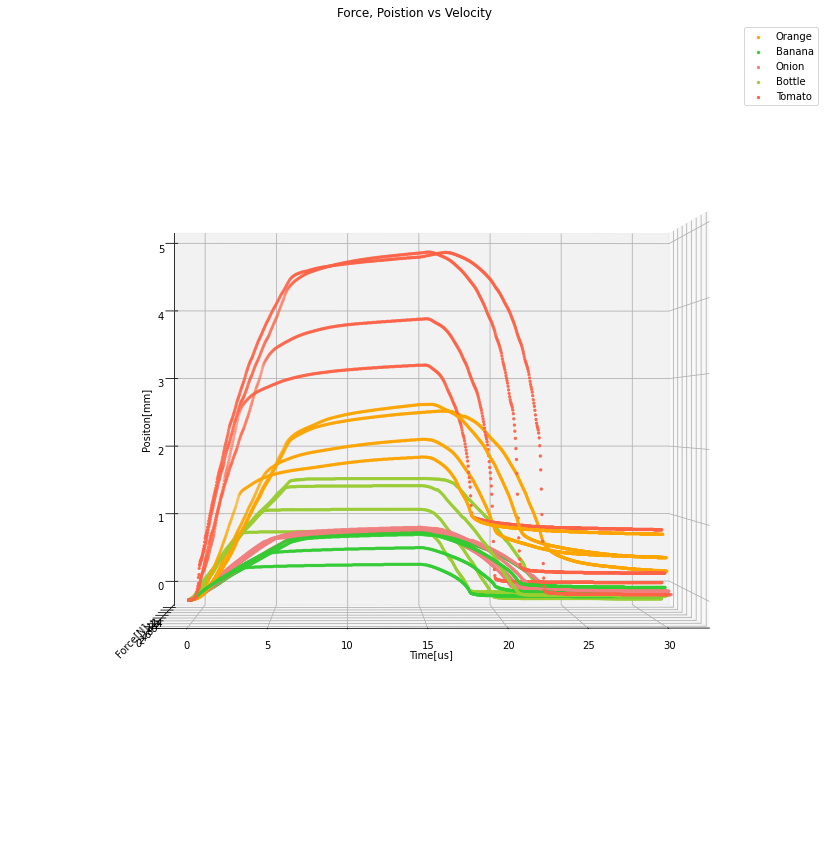

In [147]:
import matplotlib as mpl
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize = (15,15))
ax = fig.gca(projection = '3d')
#plt.title('Force, Poistion vs Velocity')

x0 = data10[:,0]    # time s
y0 = data10[:,2]    # Force N
z0 = data10[:,3]    # position mm

x1 = data11[:,0]    # time s
y1 = data11[:,2]    # Force N
z1 = data11[:,3]    # position mm

x2 = data12[:,0]    # time s
y2 = data12[:,2]    # Force N
z2 = data12[:,3]    # position mm

x3 = data13[:,0]    # time s
y3 = data13[:,2]    # Force N
z3 = data13[:,3]    # position mm

x20 = data20[:,0]    # time s
y20 = data20[:,2]    # Force N
z20 = data20[:,3]    # position mm

x21 = data21[:,0]    # time s
y21 = data21[:,2]    # Force N
z21 = data21[:,3]    # position mm

x22 = data22[:,0]    # time s
y22 = data22[:,2]    # Force N
z22 = data22[:,3]    # position mm

x23 = data23[:,0]    # time s
y23 = data23[:,2]    # Force N
z23 = data23[:,3]    # position mm

x30 = data30[:,0]    # time s
y30 = data30[:,2]    # Force N
z30 = data30[:,3]    # position mm

x31 = data31[:,0]    # time s
y31 = data31[:,2]    # Force N
z31 = data31[:,3]    # position mm

x32 = data32[:,0]    # time s
y32 = data32[:,2]    # Force N
z32 = data32[:,3]    # position mm

x33 = data33[:,0]    # time s
y33 = data33[:,2]    # Force N
z33 = data33[:,3]    # position mm

x40 = data40[:,0]    # time s
y40 = data40[:,2]    # Force N
z40 = data40[:,3]    # position mm

x41 = data41[:,0]    # time s
y41 = data41[:,2]    # Force N
z41 = data41[:,3]    # position mm

x42 = data42[:,0]    # time s
y42 = data42[:,2]    # Force N
z42 = data42[:,3]    # position mm

x43 = data43[:,0]    # time s
y43 = data43[:,2]    # Force N
z43 = data43[:,3]    # position mm

x50 = data50[:,0]    # time s
y50 = data50[:,2]    # Force N
z50 = data50[:,3]    # position mm

x51 = data51[:,0]    # time s
y51 = data51[:,2]    # Force N
z51 = data51[:,3]    # position mm

x52 = data52[:,0]    # time s
y52 = data52[:,2]    # Force N
z52 = data52[:,3]    # position mm

x53 = data53[:,0]    # time s
y53 = data53[:,2]    # Force N
z53 = data53[:,3]    # position mm

x60 = data60[:,0]    # time s
y60 = data60[:,2]    # Force N
z60 = data60[:,3]    # position mm

x61 = data61[:,0]    # time s
y61 = data61[:,2]    # Force N
z61 = data61[:,3]    # position mm

x62 = data62[:,0]    # time s
y62 = data62[:,2]    # Force N
z62 = data62[:,3]    # position mm

x63 = data63[:,0]    # time s
y63 = data63[:,2]    # Force N
z63 = data63[:,3]    # position mm

ax.scatter(x0,y0,z0, label = 'Orange',marker = '.',color = 'orange')
ax.scatter(x1,y1,z1, marker = '.',color = 'orange')
ax.scatter(x2,y2,z2,marker = '.',color = 'orange')
ax.scatter(x3,y3,z3, marker = '.',color = 'orange')

ax.scatter(x20,y20,z20, label = 'Banana',marker = '.',color = 'limegreen')
ax.scatter(x21,y21,z21, marker = '.',color = 'limegreen')
ax.scatter(x22,y22,z22,marker = '.',color = 'limegreen')
ax.scatter(x23,y23,z23, marker = '.',color = 'limegreen')

#ax.scatter(x30,y30,z30, label = 'Sponge',marker = '.',color = 'khaki')
#ax.scatter(x31,y31,z31, marker = '.',color = 'khaki')
#ax.scatter(x32,y32,z32,marker = '.',color = 'khaki')
#ax.scatter(x33,y33,z33, marker = '.',color = 'khaki')

ax.scatter(x40,y40,z40, label = 'Onion',marker = '.',color = 'lightcoral')
ax.scatter(x41,y41,z41, marker = '.',color = 'lightcoral')
ax.scatter(x42,y42,z42,marker = '.',color = 'lightcoral')
ax.scatter(x43,y43,z43, marker = '.',color = 'lightcoral')

ax.scatter(x50,y50,z50, label = 'Bottle',marker = '.',color = 'yellowgreen')
ax.scatter(x51,y51,z51, marker = '.',color = 'yellowgreen')
ax.scatter(x52,y52,z52,marker = '.',color = 'yellowgreen')
ax.scatter(x53,y53,z53, marker = '.',color = 'yellowgreen')

ax.scatter(x60,y60,z60, label = 'Tomato',marker = '.',color = 'tomato')
ax.scatter(x61,y61,z61, marker = '.',color = 'tomato')
ax.scatter(x62,y62,z62,marker = '.',color = 'tomato')
ax.scatter(x63,y63,z63, marker = '.',color = 'tomato')

ax.set_xlabel('Time[us]')
ax.set_ylabel('Force[N]')
ax.set_zlabel('Positon[mm]')

for x in range(0,360,1):
    ax.view_init(0, x-90)
    plt.savefig(str(x)+'.png')

#ax.view_init(0,270)
ax.legend()
plt.show()


